<a href="https://colab.research.google.com/github/charurathour/Data-science-projects/blob/main/Time_series_analysis_with_ARIMA_and_Holt_winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series prediction using Arima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

In [3]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.9 MB/s eta 0:00:00


In [4]:
from pmdarima import auto_arima

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

100%|██████████| 480k/480k [00:00<00:00, 82.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rohitsahoo/sales-forecasting/versions/2


In [14]:
import os
dataset_path='/root/.cache/kagglehub/datasets/rohitsahoo/sales-forecasting/versions/2'
print(os.listdir(dataset_path))

['train.csv']


In [15]:
df=pd.read_csv(dataset_path+'/train.csv')

In [16]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [18]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')

In [21]:
monthly_sales=df.groupby(pd.Grouper(key='Order Date',freq='ME'))['Sales'].sum()

In [22]:
monthly_sales.head()

,Sales
Order Date,
2015-01-31,14205.707
2015-02-28,4519.892
2015-03-31,55205.797
2015-04-30,27906.855
2015-05-31,23644.303


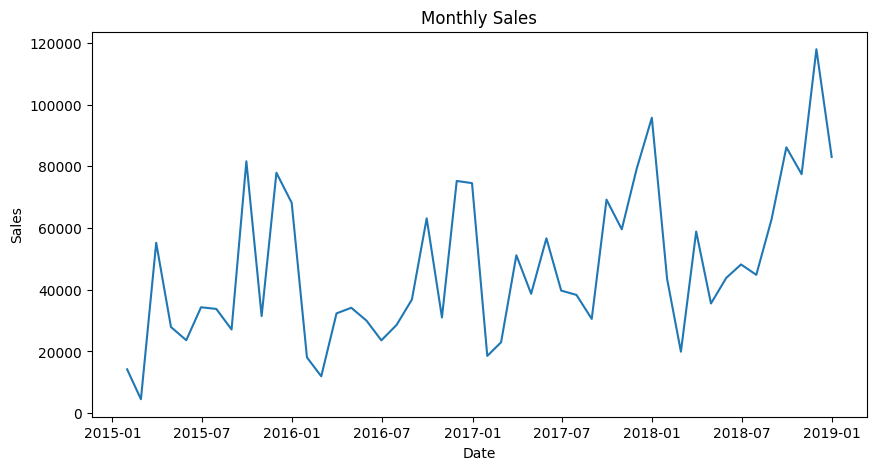

In [24]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

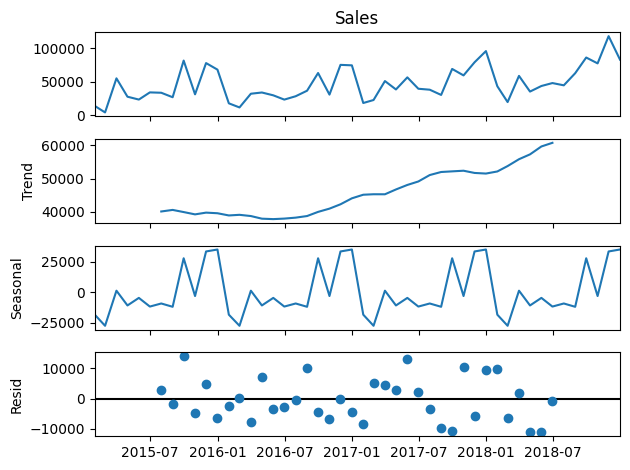

In [27]:
decomposition=seasonal_decompose(monthly_sales,model='additive')
fig = decomposition.plot()
plt.show()

In [29]:
def check_stationarity(timeseries):
  result= adfuller(timeseries)
  print('Augmented Dickey-fuller test results')
  print('ADf statistics', result[0])
  print('p-value', result[1])
  print('Critical values')
  for key, value in result[4].items():
    print(f'{key}: {value}')
  return result[1] < 0.05

is_stationary = check_stationarity(monthly_sales)
print(f"The time series is {'staionary' if is_stationary else 'non-stationary'}")


Augmented Dickey-fuller test results
ADf statistics -4.416136761430769
p-value 0.00027791039276670623
Critical values
1%: -3.5778480370438146
5%: -2.925338105429433
10%: -2.6007735310095064
The time series is staionary


In [39]:
auto_model = auto_arima(monthly_sales,
                        start_p=0,start_q=0,
                        max_p=5, max_q=5,
                        m=12,
                        seasonal=True,
                        d=None,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1085.632, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1096.560, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1076.500, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1077.487, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1094.708, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1089.579, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.250, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1078.452, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1080.901, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1079.864, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.035, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.635, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.151, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.267, Time=0.21 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1075.518, Time=0.11 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1078.501, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=1076.937, Time=0.34 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1076.040, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1076.285, Time=0.18 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1076.328, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[12] intercept   : AIC=1078.253, Time=0.21 sec
 ARIMA(2,1,0)(1,0,0)[12]             : AIC=1071.915, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=1086.029, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12]             : AIC=1073.387, Time=0.16 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=1073.425, Time=0.12 sec
 ARIMA(2,1,0)(0,0,1)[12]             : AIC=1077.098, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[12]             : AIC=1075.363, Time=0.75 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=1074.570, Time=0.04 sec
 ARIMA(3,1,0)(1,0,0)[12]             : AIC=1074.296, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=1074.696, Time=0.15 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=1072.847, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[12]             : AIC=1074.949, Time=0.23 sec

Best model:  ARIMA(2,1,0)(1,0,0)[12]          
Total fit time: 4.670 seconds


In [40]:
model = ARIMA(monthly_sales,
              order=auto_model.order,
              seasonal_order=auto_model.seasonal_order)
results=model.fit()

In [41]:
forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)
mean_forecast = forecast.predicted_mean

In [42]:
conf_int_95=forecast.conf_int(alpha=0.05)
conf_int_80=forecast.conf_int(alpha=0.2)
conf_int_70=forecast.conf_int(alpha=0.3)

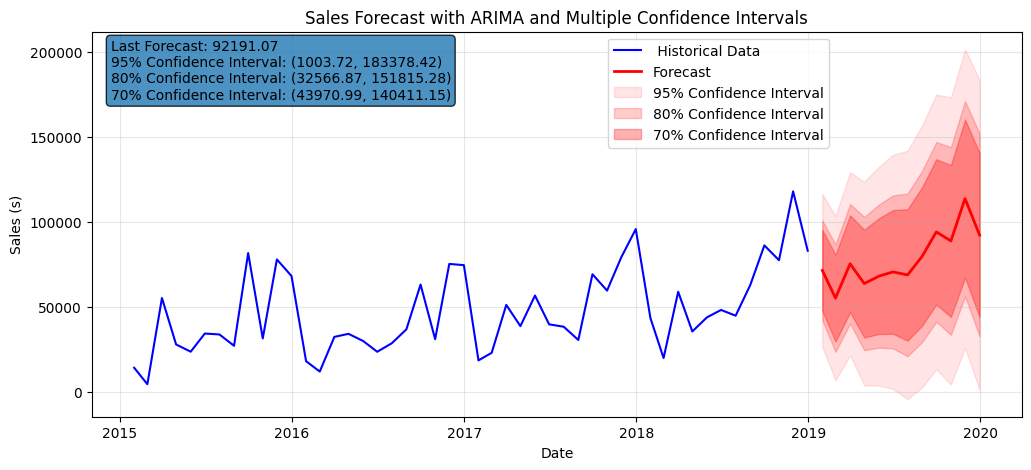

In [63]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales, label=' Historical Data', color='blue')
plt.plot(mean_forecast, label='Forecast',color='red',linewidth=2)

#plot confidence intervals
plt.fill_between(conf_int_95.index,
                 conf_int_95.iloc[:, 0],
                 conf_int_95.iloc[:, 1],
                 color='red', alpha=.1,label='95% Confidence Interval')

plt.fill_between(mean_forecast.index,
                 conf_int_80.iloc[:,0],
                 conf_int_80.iloc[:,1],
                 color='red', alpha=.2,label='80% Confidence Interval')

plt.fill_between(mean_forecast.index,
                 conf_int_70.iloc[:,0],
                 conf_int_70.iloc[:,1],
                 color='red', alpha=.3,label='70% Confidence Interval')

plt.title('Sales Forecast with ARIMA and Multiple Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Sales (s)')
plt.legend(loc='upper right',bbox_to_anchor=(0.8, 1))
plt.grid(True, alpha=0.3)

last_forecast = mean_forecast.iloc[-1]
ranges_95_lower = conf_int_95.iloc[-1, 0]
ranges_95_upper = conf_int_95.iloc[-1, 1]
ranges_80_lower = conf_int_80.iloc[-1, 0]
ranges_80_upper = conf_int_80.iloc[-1, 1]
ranges_70_lower = conf_int_70.iloc[-1, 0]
ranges_70_upper = conf_int_70.iloc[-1, 1]

# create info text
info_text = f"Last Forecast: {last_forecast:.2f}\n"
info_text += f"95% Confidence Interval: ({ranges_95_lower:.2f}, {ranges_95_upper:.2f})\n"
info_text += f"80% Confidence Interval: ({ranges_80_lower:.2f}, {ranges_80_upper:.2f})\n"
info_text += f"70% Confidence Interval: ({ranges_70_lower:.2f}, {ranges_70_upper:.2f})"

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, verticalalignment='top',bbox=dict(boxstyle='round',alpha=0.8))

plt.show()

In [74]:
models=[]
specifications=[{'name':'Fixed Parameters',
                 'model':ExponentialSmoothing(
                     monthly_sales,
                     trend='add',
                     seasonal='add',
                     seasonal_periods=12,
                     damped_trend=True).fit(
                         smoothing_level=0.2,
                         smoothing_trend=0.1,
                         smoothing_seasonal=0.1,
                         optimized=False,
                         damping_trend=0.98
                     )
                     },
                {'name':'Multiplicative Seasonal',
                 'model':ExponentialSmoothing(
                     monthly_sales,
                     trend='add',
                     seasonal='mul',
                     seasonal_periods=12,
                     damped_trend=True).fit(
                         smoothing_level=0.2,
                         smoothing_trend=0.1,
                         smoothing_seasonal=0.1,
                         optimized=False,
                         damping_trend=0.98
                 )
                                              },
                {'name':'Multiplicative Trend',
                 'model':ExponentialSmoothing(
                     monthly_sales,
                     trend='mul',
                     seasonal='add',
                     seasonal_periods=12,
                     damped_trend=True).fit(
                         smoothing_level=0.2,
                         smoothing_trend=0.1,
                         smoothing_seasonal=0.1,
                         optimized=False,
                         damping_trend=0.98
                 )}]

In [76]:
result=[]
for spec in specifications:
    model = spec['model']
    name = spec['name']

    #calculate metrics
    rmse = np.sqrt(mean_squared_error(monthly_sales, model.fittedvalues))
    mae = mean_absolute_error(monthly_sales, model.fittedvalues)

    result.append({ 'name':name,'rmse':rmse,
                    'mae':mae,
                    'model':model})

In [77]:
best_model=min(result, key=lambda x: x['rmse'])
hw_model =best_model['model']
hw_forecast = hw_model.forecast(steps=forecast_periods)
